In [1]:
! pip install --upgrade langchain


In [2]:
! pip install langgraph langsmith

In [3]:
from langgraph.graph import StateGraph, START,END
from langgraph.prebuilt import ToolNode, tools_condition
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

In [4]:
from dotenv import load_dotenv
import os
load_dotenv()
os.getenv

<function os.getenv(key, default=None)>

In [5]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.0,
    max_tokens=1000,
    streaming=True,
)
llm.invoke("What is the latest news on AI?").content

"I'm unable to provide real-time news updates, but I can summarize some of the major trends and developments in AI up to October 2023. Here are a few key areas of focus:\n\n1. **Generative AI**: Tools like OpenAI's GPT-4 and other large language models continue to evolve, with applications expanding into creative fields, customer service, and more. These models are being integrated into various industries to enhance productivity and creativity.\n\n2. **AI in Healthcare**: AI is increasingly being used for diagnostics, personalized medicine, and drug discovery. Machine learning models are helping to predict patient outcomes and improve treatment plans.\n\n3. **Ethical AI and Regulation**: There is ongoing discussion about the ethical implications of AI, including bias, privacy, and job displacement. Governments and organizations are working on frameworks and regulations to ensure responsible AI development and deployment.\n\n4. **AI and Automation**: AI-driven automation is transforming

In [6]:
from langchain_community.tools.openweathermap.tool import OpenWeatherMapQueryRun
from langchain_community.utilities.openweathermap import OpenWeatherMapAPIWrapper
from langchain_tavily import TavilySearch
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.utilities.arxiv import ArxivAPIWrapper  # Searches for academic papers.
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper






weather_tool = OpenWeatherMapQueryRun(api_wrapper=OpenWeatherMapAPIWrapper())
tavily_tool = TavilySearch()
arxiv_tool = ArxivQueryRun(api_wrapper=ArxivAPIWrapper())
wiki_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())
tools = [weather_tool,tavily_tool,arxiv_tool,wiki_tool]

In [7]:
llm_with_tools = llm.bind_tools(tools)

In [8]:
llm_with_tools.invoke("what is the weather in New York?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_6rDTkEtuyej1KkBeWXKHR0UN', 'function': {'arguments': '{"location":"New York,US"}', 'name': 'open_weather_map'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'service_tier': 'default'}, id='run--76a90fed-b84c-4b35-97c3-7e7681b5da08-0', tool_calls=[{'name': 'open_weather_map', 'args': {'location': 'New York,US'}, 'id': 'call_6rDTkEtuyej1KkBeWXKHR0UN', 'type': 'tool_call'}])

In [9]:
class state(TypedDict):
    messages: Annotated[list,add_messages]

graph_builder = StateGraph(state)


In [10]:
def Biva(state):
   return {"messages": [llm_with_tools.invoke(state["messages"])]}  

graph_builder.add_node("Biva",Biva)
graph_builder.add_node("tools",ToolNode(tools))
graph_builder.add_edge(START, "Biva")
graph_builder.add_conditional_edges("Biva",tools_condition)
graph_builder.add_edge("tools","Biva")
graph_builder.add_edge("Biva", END)
graph = graph_builder.compile()

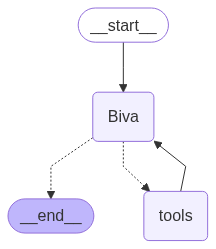

In [11]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


In [12]:
state = {
    "messages": [
        {"role": "user", "content": "What is the latest news on AI?"},
        {"role": "user", "content": "What research papers have been published on AI?"},
        {"role": "user", "content": "Who is Sharukh Khan?"}
    ]
}

messages = graph.invoke(state)
for m in messages["messages"]:
    m.pretty_print() 


================================ Human Message =================================

What is the latest news on AI?
================================ Human Message =================================

What research papers have been published on AI?
================================ Human Message =================================

Who is Sharukh Khan?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_BrZS2nbUhqbPZ6a3d9XQV8f3)
 Call ID: call_BrZS2nbUhqbPZ6a3d9XQV8f3
  Args:
    query: latest news on AI
    topic: news
  arxiv (call_1dYOtafzCMhx7CcaQcmZ1dx4)
 Call ID: call_1dYOtafzCMhx7CcaQcmZ1dx4
  Args:
    query: AI
  wikipedia (call_5Lw3d50szN87LLBIPcfnp4CW)
 Call ID: call_5Lw3d50szN87LLBIPcfnp4CW
  Args:
    query: Shah Rukh Khan
================================= Tool Message =================================
Name: tavily_search

{"query": "latest news on AI", "follow_up_questions": null, "answer": null, "images": [], "results

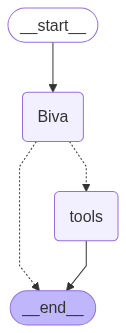

In [13]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

builder = StateGraph(State)

builder.add_node("Biva",Biva)
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START, "Biva")
builder.add_conditional_edges("Biva",tools_condition)
builder.add_edge("Biva",END)
builder.add_edge("tools",END)
builder.compile()


In [14]:
graph_v1 = builder.compile()
state = {
    "messages": [
        {"role": "user", "content": "What is the latest news on AI?"},
        {"role": "user", "content": "What research papers have been published on AI?"},
        {"role": "user", "content": "Who is Sharukh Khan?"}
    ]
}

messages = graph_v1.invoke(state)
for m in messages["messages"]:
    m.pretty_print() 


================================ Human Message =================================

What is the latest news on AI?
================================ Human Message =================================

What research papers have been published on AI?
================================ Human Message =================================

Who is Sharukh Khan?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_zG2NQL06vkzSigCnM83i2DxD)
 Call ID: call_zG2NQL06vkzSigCnM83i2DxD
  Args:
    query: latest news on AI
    topic: news
  arxiv (call_ezjn5XH26ENdgzwuYiHQ3IeA)
 Call ID: call_ezjn5XH26ENdgzwuYiHQ3IeA
  Args:
    query: AI
  wikipedia (call_ifeE4II5Jv9NJlj3xm5jk9t2)
 Call ID: call_ifeE4II5Jv9NJlj3xm5jk9t2
  Args:
    query: Shah Rukh Khan
================================= Tool Message =================================
Name: tavily_search

{"query": "latest news on AI", "follow_up_questions": null, "answer": null, "images": [], "results

In [15]:
def chat():
    state = {"messages": []}
    print('Type "quit" to exit.\n')
    while True:
        user = input("You: ").strip()
        if user.lower() in {"quit", "exit", "q"}:
            break
        state["messages"].append({"role": "user", "content": user})
        reply_state = graph.invoke(state)
        state["messages"] = reply_state["messages"]
        print("Assistant:", state["messages"][-1].content)

chat()


Type "quit" to exit.

Assistant: The current Prime Minister of India is Narendra Modi. He has been serving since May 26, 2014, and is the first to win three consecutive elections to secure a third successive term.
